In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
num_train = mnist.train.num_examples #55,000
num_validation = mnist.validation.num_examples #5000
num_test = mnist.test.num_examples #10,000

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import time

<h1> Part a </h1>

In [3]:
#you can print out the label for 1st figure
print(mnist.train.labels[0])

#learning rate
lr = 0.01
#number of traning steps
#num_steps =500
#number of batch_size
batch_size = 128

#network parameters
n_hidden_1 = 300
num_input = 784
num_classes = 10
layers_dims = [num_input, n_hidden_1, num_classes]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [4]:
def relu(Z):
    A = np.maximum(0, Z)
    return A, Z

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z

In [5]:
def softmax(x):
    #print( np.sum(np.exp(x), axis=1).shape)
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

In [6]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce

In [7]:
def initialize_parameters_zeros(layers_dims):
    np.random.seed(1)               
    parameters = {}
    L = len(layers_dims)            

    for l in range(1, L):           
        parameters['W' + str(l)] = np.random.normal(0,1,(layers_dims[l - 1],layers_dims[l]))
        parameters['b' + str(l)] = np.zeros((1,layers_dims[l]))

    return parameters

<h1> Part b </h1>

In [8]:
def linear_forward(A_prev, W, b):
    Z = np.matmul(A_prev, W) + b
    cache = (A_prev, W, b)
    return Z, cache

In [18]:
def linear_activation_forward(A_prev, W, b, activation):
    if  activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    elif activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    cache = (linear_cache, activation_cache)
    return A, cache

In [19]:
input_x, input_y = mnist.train.next_batch(batch_size, shuffle=False)
parameters = initialize_parameters_zeros(layers_dims)
hidden_x, cache_1 = linear_activation_forward(input_x, parameters['W1'], parameters['b1'],"relu")
output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
output_y = softmax(output_x)

In [20]:
cost = cross_entropy(output_y,input_y)
print('cost: ', cost)

cost:  2.478650668925143


<h1> Part c </h1>

In [21]:
dAL = - np.divide(input_y, output_y) + np.divide(1 - input_y, 1 - output_y);

<h1> Part d </h1>

In [22]:
def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ

In [23]:
def sigmoid_gradient(dA, Z):
    A, Z = sigmoid(Z)
    dZ = dA * A * (1 - A)

    return dZ

In [24]:
# define helper functions
def linear_backword(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[0]
    
    dW = (1 / m) * np.dot(A_prev.T, dZ)
    db = (1 / m) * np.sum(dZ, axis=0, keepdims=True)
    dA_prev = np.dot(dZ, W.T) 

    return dA_prev, dW, db

In [25]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_gradient(dA, activation_cache)
        dA_prev, dW, db = linear_backword(dZ, linear_cache)

    return dA_prev, dW, db

In [ ]:
# def back_propagate(parameters, grads, learning_rate):
#     L = len(parameters) // 2
#     for l in range(1, L + 1):
#         parameters["W" + str(l)] = parameters[
#             "W" + str(l)] - learning_rate * grads["dW" + str(l)]
#         parameters["b" + str(l)] = parameters[
#             "b" + str(l)] - learning_rate * grads["db" + str(l)]
#     return parameters

In [26]:
grads = {}
grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache_2, "sigmoid")

In [27]:
grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache_1, "relu")

<h1> Part e </h1>

In [28]:
batch_size_list = [16,64,256,1024]
iterations = 3000

In [31]:
parameters = initialize_parameters_zeros(layers_dims)
grads = {}
cost_list = []

In [32]:
def accuracy(X, parameters, y):
    hidden_x, cache_1 = linear_activation_forward(X, parameters['W1'], parameters['b1'],"relu")
    output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
    output_y = softmax(output_x)

    predict = np.argmax(output_y, axis = 1)
    labels = np.argmax(y, axis = 1)
    accuracy = np.mean(labels == predict) * 100
    return accuracy

In [35]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] = parameters[
            "W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters[
            "b" + str(l)] - learning_rate * grads["db" + str(l)]
    return parameters

batch size:16, accuracy: 40.51%, training time: 14.3704 seconds
batch size:64, accuracy: 42.91%, training time: 17.3692 seconds
batch size:256, accuracy: 42.99%, training time: 39.0878 seconds
batch size:1024, accuracy: 43.04%, training time: 129.5805 seconds


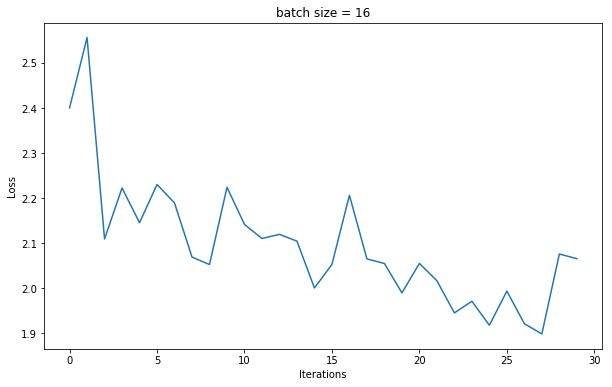

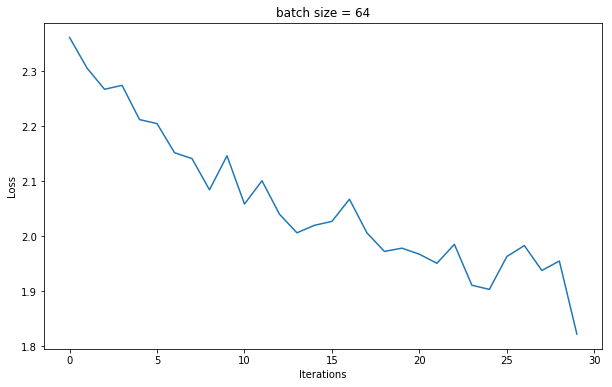

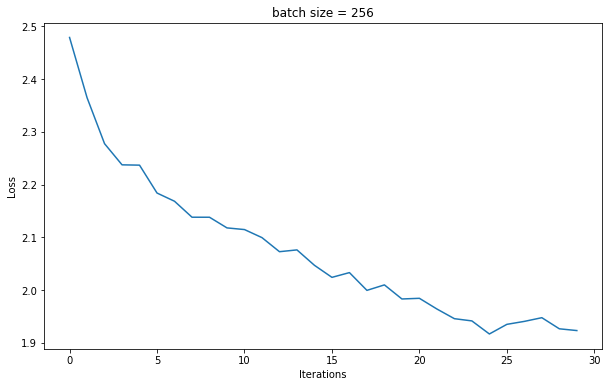

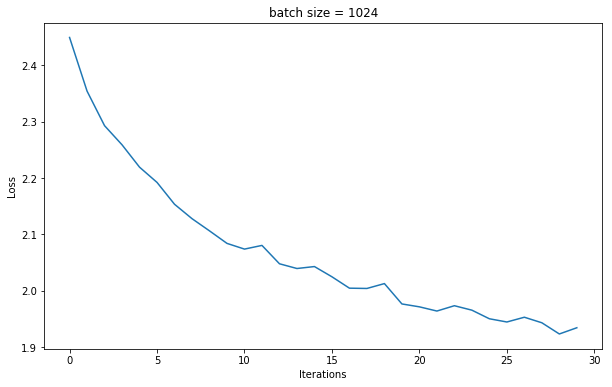

In [40]:
for j in range(len(batch_size_list)):
    batch_size = batch_size_list[j]
    cost_list = []
    grads = {}
    parameters = initialize_parameters_zeros(layers_dims)
    start_time = time.time()
    for i in range(iterations):
        input_x, input_y = mnist.train.next_batch(batch_size)
        hidden_x, cache_1 = linear_activation_forward(input_x, parameters['W1'], parameters['b1'],"relu")
        output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
        output_y = softmax(output_x)
        cost = cross_entropy(output_y,input_y)
        dAL = - (np.divide(input_y, output_y) - np.divide(1 - input_y, 1 - output_y));
        grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache_2, "sigmoid")
        grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache_1, "relu")
        parameters = update_parameters(parameters, grads, lr)

        if i % 100 == 0:
            cost_list.append(cost)
    use_time = time.time() - start_time
    accu = accuracy(mnist.test.images, parameters, mnist.test.labels)
    print(f"batch size:{batch_size}, accuracy: {accu:.2f}%, training time: {use_time:.4f} seconds")
    
    plt.figure(j,figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("batch size = %d" % batch_size)

<h1> Part f </h1>

In [42]:
def update_parameters_Adam(parameters, grads, lr, t, vs, sqrs):
    beta1 = 0.9
    beta2 = 0.999
    eps_stable = 1e-8
    
    for index in parameters:
        param = parameters[index]
        grad = grads["d" + index]
        v = vs[index]
        sqr = sqrs[index]
        v[:] = beta1 * v + (1. - beta1) * grad
        sqr[:] = beta2 * sqr + (1. - beta2) * np.square(grad)

        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)

        div = lr * v_bias_corr / (np.sqrt(sqr_bias_corr) + eps_stable)
        param[:] = param - div
    
    return parameters, vs, sqrs

In [43]:
def initialize_adam_parameter(parameters):
    vs = {}
    sqrs = {}
    L = len(parameters) // 2

    for l in range(1, L + 1):
        vs["W" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        vs["b" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        sqrs["W" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        sqrs["b" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        
    return vs, sqrs
    

batch size:16, accuracy: 40.86%, training time: 44.6053 seconds
batch size:64, accuracy: 60.09%, training time: 47.9405 seconds
batch size:256, accuracy: 92.97%, training time: 69.2451 seconds
batch size:1024, accuracy: 86.78%, training time: 163.1015 seconds


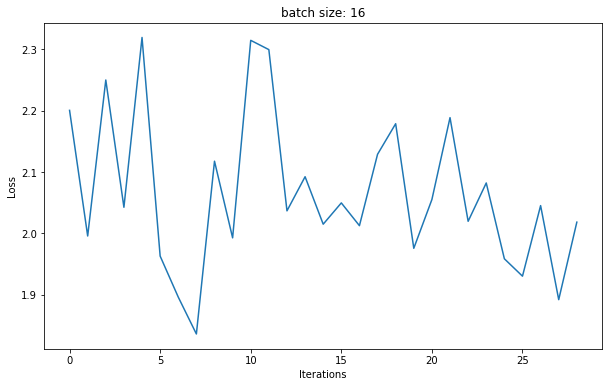

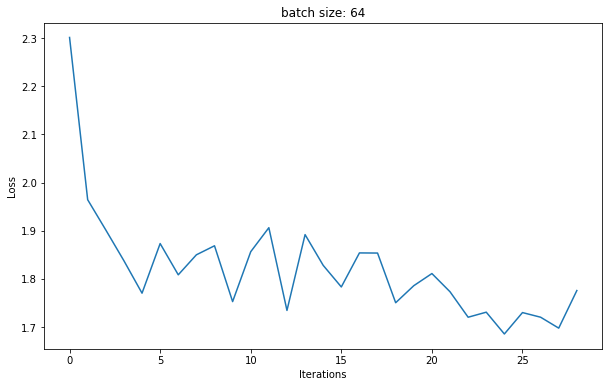

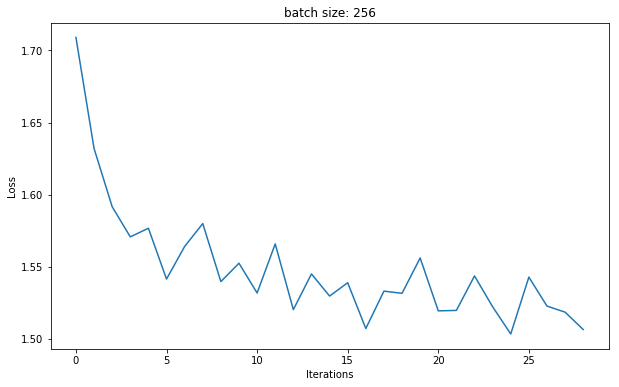

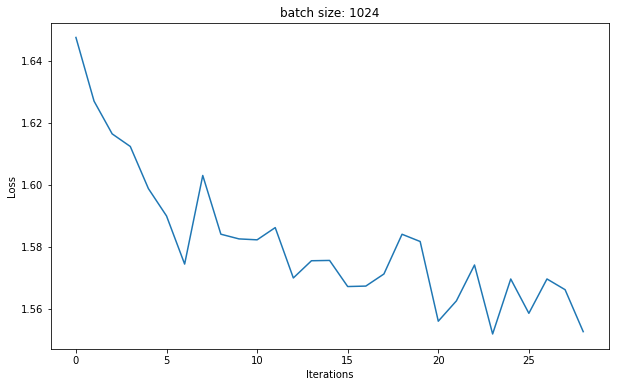

In [44]:
for j in range(len(batch_size_list)):
    batch_size = batch_size_list[j]
    cost_list = []
    grads = {}
    parameters = initialize_parameters_zeros(layers_dims)

    vs, sqrs = initialize_adam_parameter(parameters)
    #print(vs)
    start_time = time.time()
    
    for i in range(1,iterations):
        input_x, input_y = mnist.train.next_batch(batch_size)
        hidden_x, cache_1 = linear_activation_forward(input_x, parameters['W1'], parameters['b1'],"relu")
        output_x, cache_2 = linear_activation_forward(hidden_x, parameters['W2'], parameters['b2'],"sigmoid")
        output_y = softmax(output_x)
        cost = cross_entropy(output_y,input_y)
        dAL = - (np.divide(input_y, output_y) - np.divide(1 - input_y, 1 - output_y));

        grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache_2, "sigmoid")
        grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache_1, "relu")
        parameters, vs, sqrs = update_parameters_Adam(parameters, grads, lr, i, vs, sqrs)

        if i % 100 == 0:
            cost_list.append(cost)
    
    use_time = time.time() - start_time
    accu = accuracy(mnist.test.images, parameters, mnist.test.labels)
    print(f"batch size:{batch_size}, accuracy: {accu:.2f}%, training time: {use_time:.4f} seconds")
    
    plt.figure(j,figsize=(10, 6))
    plt.plot(cost_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"batch size: {batch_size}")

<h1> Part g </h1>

batch size:16, accuracy: 16.27%, training time: 4.0209 seconds
batch size:64, accuracy: 27.09%, training time: 4.9819 seconds
batch size:256, accuracy: 13.51%, training time: 6.5872 seconds
batch size:1024, accuracy: 23.92%, training time: 14.2954 seconds


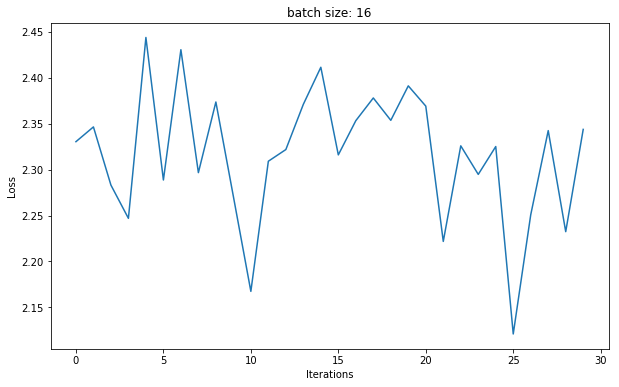

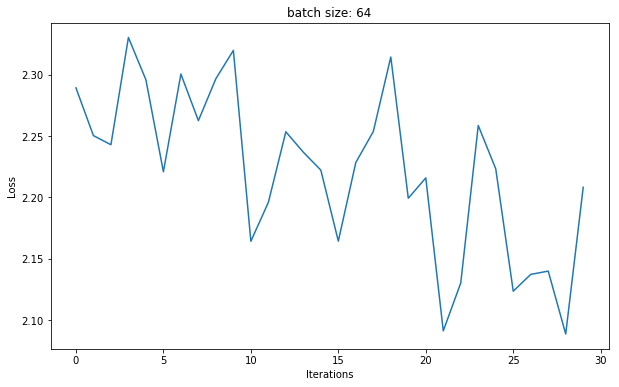

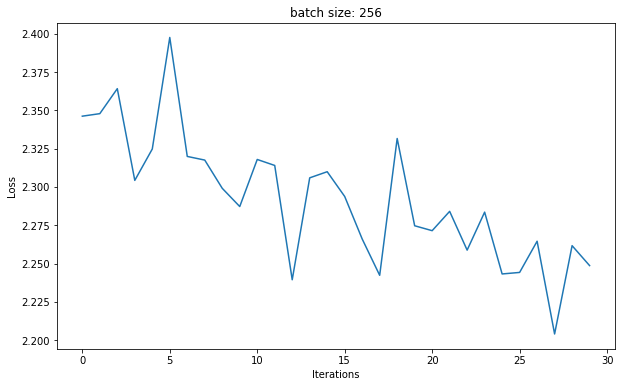

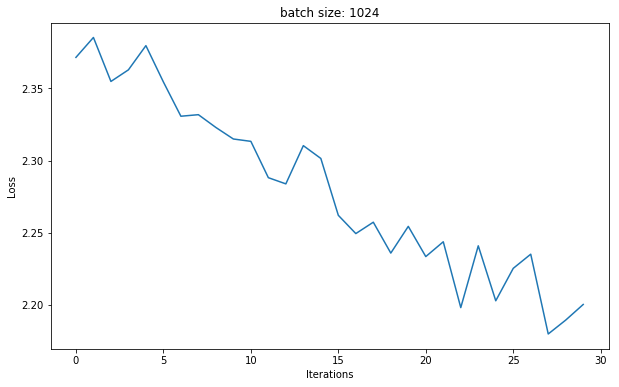

In [53]:
#fixed network parameters
num_input = 784
num_classes = 10
n_hidden_1 = 300
lr_set = 0.01
num_steps_set = 3000
batch_size_set = [16,64,256,1024]
    #varied network parameters
for batch_size in batch_size_set:
                    
    #Define placeholder and Variables
    tf.reset_default_graph()
    #tf graph input
    X = tf.placeholder(tf.float32,[None,num_input],name='X')
    Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

    #Layers weight & bias
    weights = {
        'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
        'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes]),name='Wout')
    }

    biases = {
        'b1': tf.Variable(tf.random_normal(shape=[n_hidden_1]),name='b1'),
        'bout': tf.Variable(tf.random_normal(shape=[num_classes]),name='bout')
    }

    #define nueral network
    def neural_net(x):
        layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
        out = tf.sigmoid(tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout']))
        return out     

    #define cost function and accuracy
    #predicted labels
    logits = neural_net(X)

    #define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

    #define optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
    train_op = optimizer.minimize(loss)

    #compare the predicted labels with true labels
    correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

    #compute the accuracy by taking average
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    #Initialize the variables
    init = tf.global_variables_initializer()

    cost_list = []
    #execute training
    with tf.Session() as sess:
        sess.run(init)
        start_time = time.time()
        for i in range(num_steps):
            #fetch batch
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            if i % 100 == 0:
                cost_list.append(sess.run(loss, feed_dict={X:batch_x, Y:batch_y}))


        use_time = time.time() - start_time
        accu = sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels})*100
        print(f"batch size:{batch_size}, accuracy: {accu:.2f}%, training time: {use_time:.4f} seconds")

        # plot the cost curve
        plt.figure(figsize=(10, 6))
        plt.plot(cost_list)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title(f"batch size: {batch_size}")

batch size:16, accuracy: 29.48%, training time: 4.3985 seconds
batch size:64, accuracy: 53.65%, training time: 5.4894 seconds
batch size:256, accuracy: 74.89%, training time: 7.1007 seconds
batch size:1024, accuracy: 95.70%, training time: 14.8159 seconds


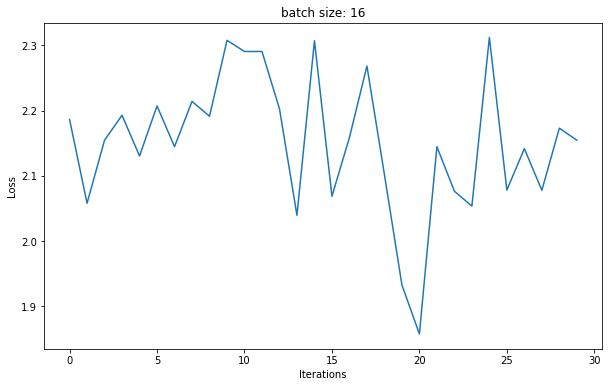

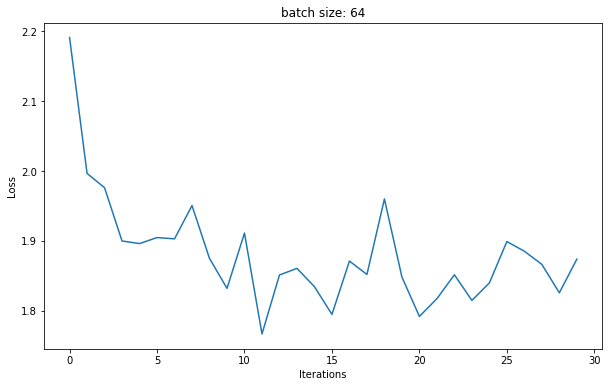

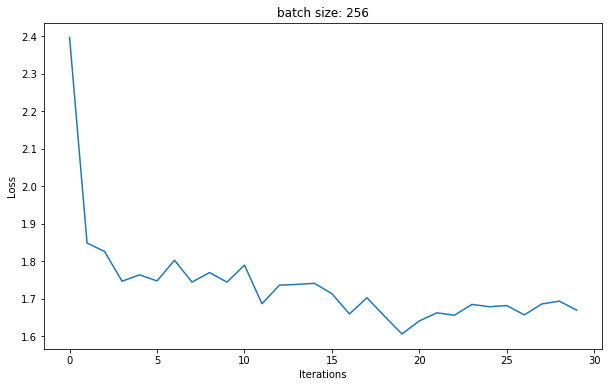

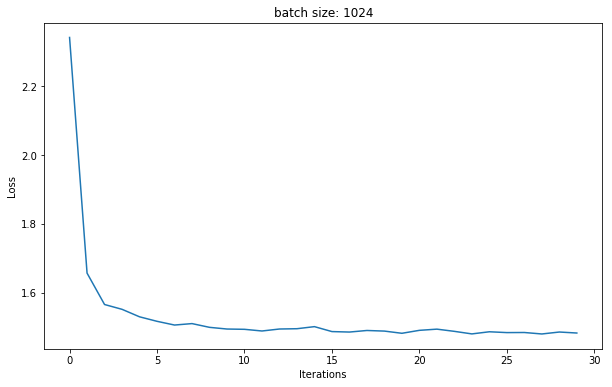

In [54]:
#fixed network parameters Adam
num_input = 784
num_classes = 10
n_hidden_1 = 300
#varied network parameters
for batch_size in batch_size_set:
    #Define placeholder and Variables
    tf.reset_default_graph()
    #tf graph input
    X = tf.placeholder(tf.float32,[None,num_input],name='X')
    Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

    #Layers weight & bias
    weights = {
        'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
        'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes]),name='Wout')
    }

    biases = {
        'b1': tf.Variable(tf.random_normal(shape=[n_hidden_1]),name='b1'),
        'bout': tf.Variable(tf.random_normal(shape=[num_classes]),name='bout')
    }

    #define nueral network
    def neural_net(x):
        layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
        out = tf.sigmoid(tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout']))
        return out     

    #define cost function and accuracy
    logits = neural_net(X)

    #define loss
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

    #define optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=lr)
    train_op = optimizer.minimize(loss)

    #compare the predicted labels with true labels
    correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

    #compute the accuracy by taking average
    accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

    #Initialize the variables
    init = tf.global_variables_initializer()
    cost_list = []
    #execute training
    with tf.Session() as sess:
        sess.run(init)
        start_time = time.time()
        for i in range(num_steps):
            #fetch batch
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            if i % 100 == 0:
                cost_list.append(sess.run(loss, feed_dict={X:batch_x, Y:batch_y}))


        use_time = time.time() - start_time
        accu = sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels})*100
        print(f"batch size:{batch_size}, accuracy: {accu:.2f}%, training time: {use_time:.4f} seconds")

        # plot the cost curve
        plt.figure(figsize=(10, 6))
        plt.plot(cost_list)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title(f"batch size: {batch_size}")

<h1> Comparision </h1>

In [ ]:
When using the same optimizer, two kinds of methods get similar results.